In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from load_data import load_data
df = load_data()

In [5]:

# 1. Agrégation quotidienne des ventes
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
daily_sales = df.set_index('order_date')['final_amount'].resample('D').sum()
daily_sales = daily_sales.replace(0, np.nan).fillna(method='ffill')

C:\Users\Abdel\AppData\Local\Temp\ipykernel_13504\3300762323.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  daily_sales = daily_sales.replace(0, np.nan).fillna(method='ffill')


In [6]:
# 2. Ventes moyennes par jour de la semaine
daily_sales_df = daily_sales.reset_index()
daily_sales_df['day_of_week'] = daily_sales_df['order_date'].dt.day_name()
sales_by_day = daily_sales_df.groupby('day_of_week')['final_amount'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

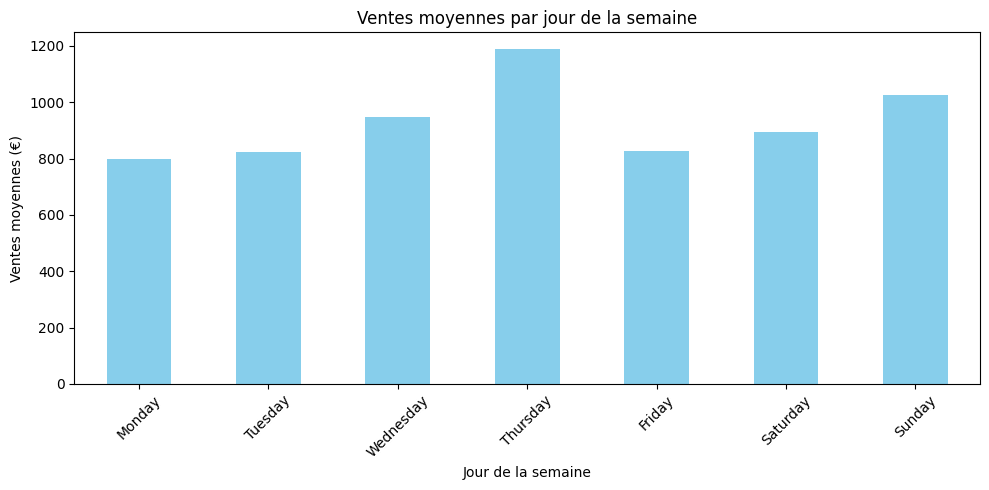

In [7]:
plt.figure(figsize=(10, 5))
sales_by_day.plot(kind='bar', color='skyblue')
plt.title('Ventes moyennes par jour de la semaine')
plt.xlabel('Jour de la semaine')
plt.ylabel('Ventes moyennes (€)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
# 3. Moyennes mobiles (7 et 30 jours)
moving_avg_7 = daily_sales.rolling(window=7).mean()
moving_avg_30 = daily_sales.rolling(window=30).mean()

In [9]:
# 4. Approximation de la tendance : moyenne glissante longue (tendance), courte (saisonnalité approx.)
trend = moving_avg_30
seasonality = moving_avg_7 - moving_avg_30
residual = daily_sales - trend - seasonality

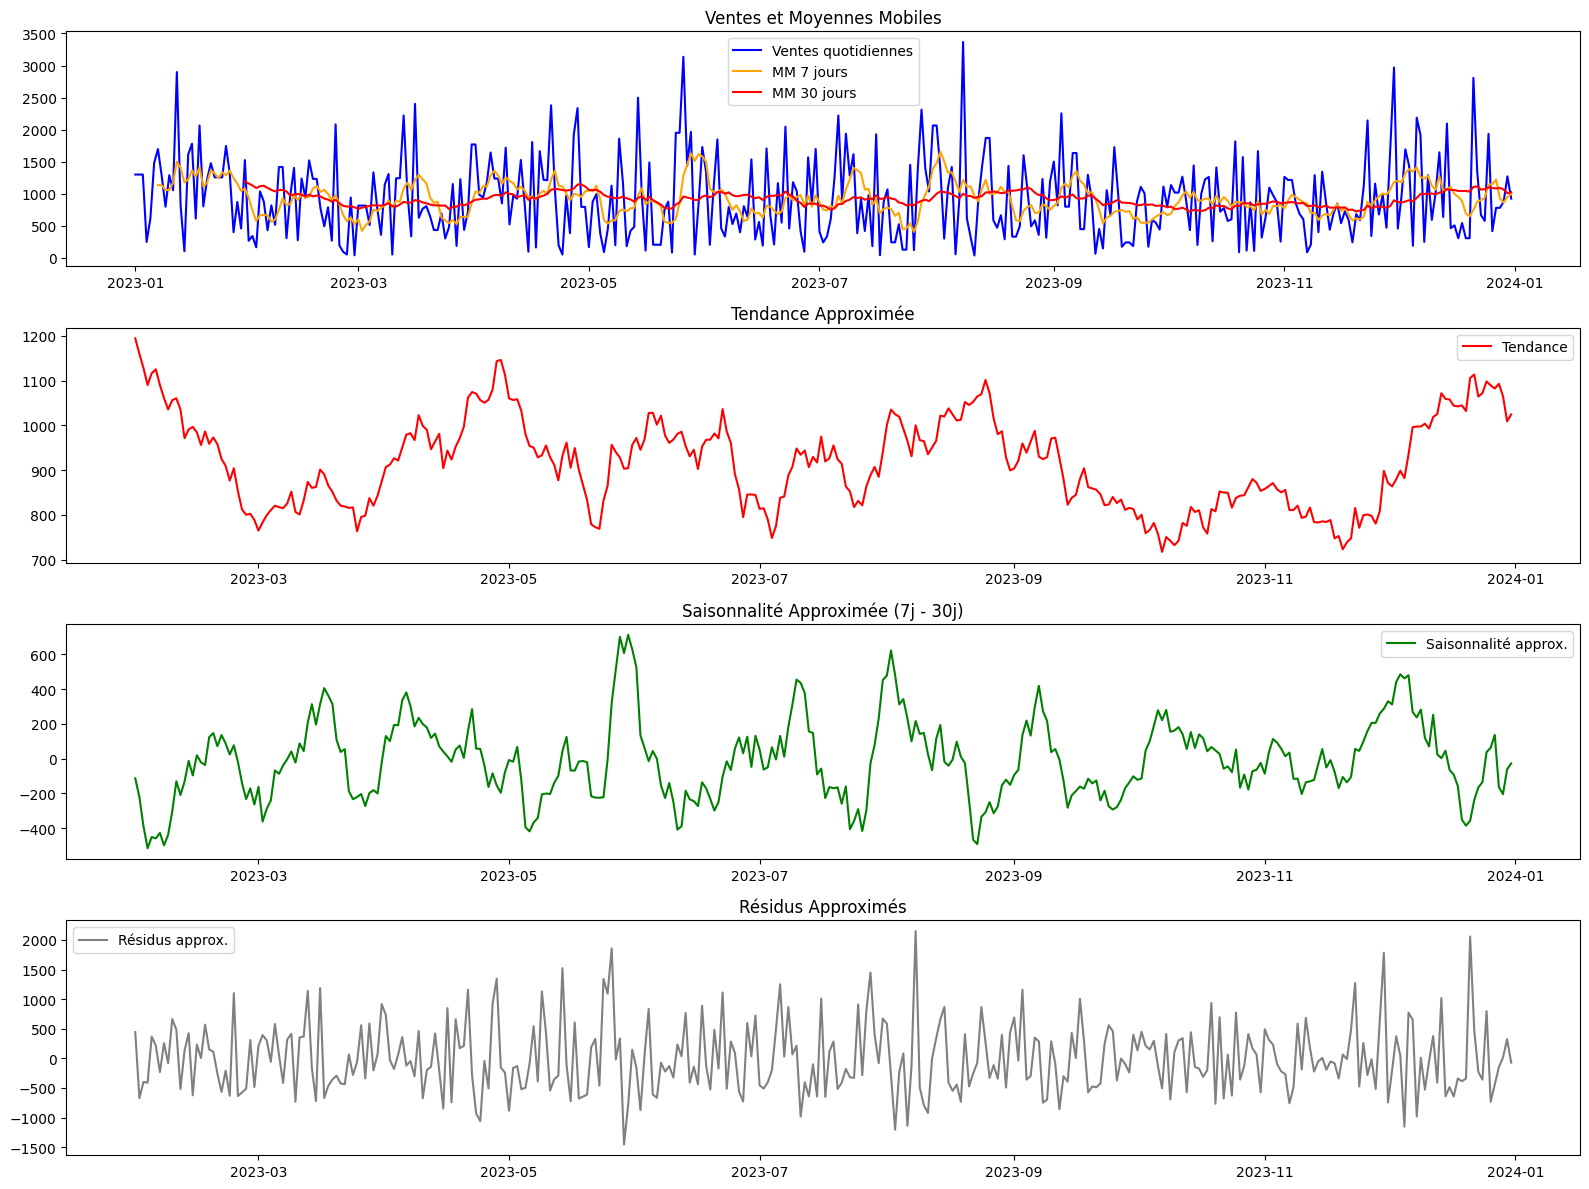

In [10]:
# 5. Visualisation globale
plt.figure(figsize=(16, 12))

plt.subplot(411)
plt.plot(daily_sales, label='Ventes quotidiennes', color='blue')
plt.plot(moving_avg_7, label='MM 7 jours', color='orange')
plt.plot(moving_avg_30, label='MM 30 jours', color='red')
plt.title('Ventes et Moyennes Mobiles')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Tendance', color='red')
plt.title('Tendance Approximée')
plt.legend()

plt.subplot(413)
plt.plot(seasonality, label='Saisonnalité approx.', color='green')
plt.title('Saisonnalité Approximée (7j - 30j)')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Résidus approx.', color='gray')
plt.title('Résidus Approximés')
plt.legend()

plt.tight_layout()
plt.show()
